In [6]:
import argparse
import os
import sys

import numpy as np
import torch
from torch.utils.tensorboard import SummaryWriter
from torch import optim
from torch.nn import CTCLoss
from torch.utils.data.dataloader import DataLoader
from tqdm import tqdm

# from torch.utils.tensorboard import SummaryWriter

import utils
from config import cfg

from PIL import Image
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

In [7]:
from generator import Generator
data_set = Generator(cfg.word.get_all_words(), 'horizontal')
train_sampler = torch.utils.data.RandomSampler(data_set)
data_loader = DataLoader(data_set, batch_size=128, sampler=train_sampler,
                             num_workers=4)
data_set.__getitem__(0)

(array([[[0.90588236, 0.90588236, 0.90588236, ..., 0.90588236,
          0.90588236, 0.90588236],
         [0.90588236, 0.90588236, 0.90588236, ..., 0.90588236,
          0.90588236, 0.90588236],
         [0.90588236, 0.90588236, 0.90588236, ..., 0.90588236,
          0.90588236, 0.90588236],
         ...,
         [0.90588236, 0.90588236, 0.90588236, ..., 0.90588236,
          0.90588236, 0.90588236],
         [0.90588236, 0.90588236, 0.90588236, ..., 0.90588236,
          0.90588236, 0.90588236],
         [0.90588236, 0.90588236, 0.90588236, ..., 0.90588236,
          0.90588236, 0.90588236]]], dtype=float32),
 array([4621, 1165, 3115, 3174, 2861,  256,  707, 3863, 4151,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]),
 125,
 9)

tensor(125) tensor(11)
(32, 512)
(32, 512, 3)


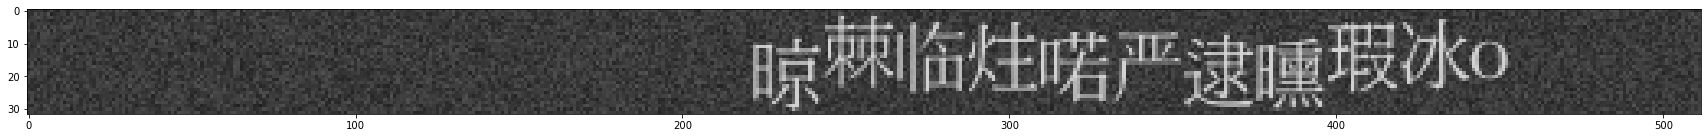

tensor([4584, 2875,  776, 4794, 3850,  722, 2851, 5346, 3517, 1502,   81,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]) tensor(11)
晾棘临炷喏严逮曛瑕冰o                26


In [5]:
for image, target, input_len, target_len in data_loader:
    print(input_len[0],target_len[0])
    image=image.numpy()
    maxpix=np.max(image)
    minpix=np.min(image)
    image=(image-minpix)/(maxpix-minpix)*255
    image=image[0][0]
    image=image.transpose(1,0)
    break

print(image.shape)
image=np.stack([image,image,image],axis=-1)
print(image.shape)
im=Image.fromarray(np.uint8(image))
im.save("t.jpeg")
plt.figure(1,figsize=(30,500))
plt.imshow(im)
plt.show()
print(target[0],target_len[0])
alpha=data_set.alpha
txt="".join([alpha[i] for i in target[0]])
print(txt,len(txt))

In [154]:
# image, indices, target_len=data_loader(0)


(32, 512, 3)
(32, 512, 3, 3)


TypeError: Cannot handle this data type: (1, 1, 3, 3), |u1

In [33]:
maxpix=np.max(image)
minpix=np.min(image)
image=(image-minpix)/(maxpix-minpix)
image

array([[[[0.34117648, 0.0862745 , 0.21568626, ..., 0.31764707,
          0.19215685, 0.20392156],
         [0.05098039, 0.27450982, 0.20784312, ..., 0.26666668,
          0.09803921, 0.2627451 ],
         [0.3529412 , 0.1372549 , 0.3019608 , ..., 0.18039215,
          0.25490198, 0.3137255 ],
         ...,
         [0.1607843 , 0.18823528, 0.30588236, ..., 0.17254901,
          0.2352941 , 0.1490196 ],
         [0.04313725, 0.2235294 , 0.14509803, ..., 0.17254901,
          0.23137254, 0.12156862],
         [0.2901961 , 0.32941177, 0.13333333, ..., 0.07843137,
          0.18039215, 0.17647058]]],


       [[[0.7294118 , 0.73333335, 0.73333335, ..., 0.73333335,
          0.73333335, 0.73333335],
         [0.73333335, 0.73333335, 0.73333335, ..., 0.73333335,
          0.73333335, 0.7294118 ],
         [0.73333335, 0.7294118 , 0.73333335, ..., 0.73333335,
          0.73333335, 0.7294118 ],
         ...,
         [0.73333335, 0.7294118 , 0.73333335, ..., 0.73333335,
          0.73333335, 0

In [20]:
import numpy as np

np.random.seed(1111)

T, V = 12, 5
m, n = 6, V

x = np.random.random([T, m])  # T x m
w = np.random.random([m, n])  # weights, m x n

def softmax(logits):
    max_value = np.max(logits, axis=1, keepdims=True)
    exp = np.exp(logits - max_value)
    exp_sum = np.sum(exp, axis=1, keepdims=True)
    dist = exp / exp_sum
    return dist

def toy_nw(x):
    y = np.matmul(x, w)  # T x n 
    y = softmax(y)
    return y

y = toy_nw(x)
print(y)
print(y.sum(1, keepdims=True))

[[0.24654511 0.18837589 0.16937668 0.16757465 0.22812766]
 [0.25443629 0.14992236 0.22945293 0.17240658 0.19378184]
 [0.24134404 0.17179604 0.23572466 0.12994237 0.22119288]
 [0.27216255 0.13054313 0.2679252  0.14184499 0.18752413]
 [0.32558002 0.13485564 0.25228604 0.09743785 0.18984045]
 [0.23855586 0.14800386 0.23100255 0.17158135 0.21085638]
 [0.38534786 0.11524603 0.18220093 0.14617864 0.17102655]
 [0.21867406 0.18511892 0.21305488 0.16472572 0.21842642]
 [0.29856607 0.13646801 0.27196606 0.11562552 0.17737434]
 [0.242347   0.14102063 0.21716951 0.2355229  0.16393996]
 [0.26597326 0.10009752 0.23362892 0.24560198 0.15469832]
 [0.23337289 0.11918746 0.28540761 0.20197928 0.16005275]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [25]:
import numpy as np
def forward(y, labels):
    T, V = y.shape
    L = len(labels)
    alpha = np.zeros([T, L])

    # init
    alpha[0, 0] = y[0, labels[0]]
    alpha[0, 1] = y[0, labels[1]]

    for t in range(1, T):
        for i in range(L):
            s = labels[i]

            a = alpha[t - 1, i] 
            if i - 1 >= 0:
                a += alpha[t - 1, i - 1]
            if i - 2 >= 0 and s != 0 and s != labels[i - 2]:
                a += alpha[t - 1, i - 2]

            alpha[t, i] = a * y[t, s]

    return alpha

labels = [0, 3, 0, 3, 0, 4, 0]  # 0 for blank
# y=np.ones((10,5))/5

alpha = forward(y, labels)
print(alpha,labels[-1],labels[-2])
p = alpha[-1, -1] +alpha[-1, -2]
print(p)

[[2.46545113e-01 1.67574654e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.27300235e-02 7.13969720e-02 4.26370730e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.51395174e-02 1.74287803e-02 2.75214373e-02 5.54036251e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.12040964e-03 4.61964998e-03 1.22337658e-02 4.68965079e-03
  1.50787918e-03 1.03895167e-03 0.00000000e+00]
 [1.34152305e-03 8.51612635e-04 5.48713543e-03 1.64898136e-03
  2.01779193e-03 1.37377693e-03 3.38261905e-04]
 [3.20028190e-04 3.76301179e-04 1.51214552e-03 1.22442454e-03
  8.74730268e-04 1.06283215e-03 4.08416903e-04]
 [1.23322177e-04 1.01788478e-04 7.27708889e-04 4.00028082e-04
  8.08904808e-04 5.40783712e-04 5.66942671e-04]
 [2.69673617e-05 3.70815141e-05 1.81389560e-04 1.85767281e-04
  2.64362267e-04 3.82184328e-04 2.42231029e-04]
 [8.05153930e-06 7.40568461e-06 6.52280509e-05 4.24527009e-05
  1.34393412e-04 1.47631121e-04 1.86429242e-04]
 [1.951266